In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
classes = np.unique(y_train)
classes_num = len(classes)

Text(0.5, 1.0, 'Ground truth: 7')

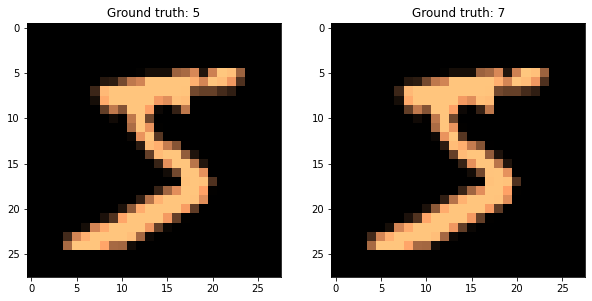

In [6]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='copper')
plt.title(f'Ground truth: {y_train[0]}')

plt.subplot(122)
plt.imshow(x_train[0,:,:], cmap='copper')
plt.title(f'Ground truth: {y_test[0]}')

In [7]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Normalization
x_train = x_train/255
x_test = x_test/255

# One hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

In [8]:
# Building the CNN

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(classes_num, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

2023-01-15 11:41:15.570626: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.python.ops.batch_ops import batch
history = model.fit(x_train, y_train_one_hot, batch_size=516, epochs=10, verbose=True, validation_data=(x_test, y_test_one_hot))

Epoch 1/10
117/117 [==============================] - 2s 15ms/step - loss: 0.3567 - accuracy: 0.8889 - val_loss: 0.1979 - val_accuracy: 0.9348
Epoch 2/10
117/117 [==============================] - 2s 14ms/step - loss: 0.1271 - accuracy: 0.9607 - val_loss: 0.1237 - val_accuracy: 0.9589
Epoch 3/10
117/117 [==============================] - 1s 12ms/step - loss: 0.0801 - accuracy: 0.9749 - val_loss: 0.0993 - val_accuracy: 0.9685
Epoch 4/10
117/117 [==============================] - 1s 12ms/step - loss: 0.0537 - accuracy: 0.9829 - val_loss: 0.0742 - val_accuracy: 0.9780
Epoch 5/10
117/117 [==============================] - 1s 12ms/step - loss: 0.0387 - accuracy: 0.9879 - val_loss: 0.0819 - val_accuracy: 0.9755
Epoch 6/10
117/117 [==============================] - 1s 12ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.0782 - val_accuracy: 0.9777
Epoch 7/10
117/117 [==============================] - 1s 12ms/step - loss: 0.0212 - accuracy: 0.9934 - val_loss: 0.0680 - val_accuracy: 0.9822

In [32]:
model.save('handwriting.model')

INFO:tensorflow:Assets written to: handwriting.model\assets


INFO:tensorflow:Assets written to: handwriting.model\assets


import cv2 as cv

img = cv.imread('img.jpg')[:,:,0]
img = np.invert(np.array([img]))
prediciton = model.predict(img)

print(f"The digit is probably {np.argmax(prediction)}")
#plt.imshow(img[0], cmap=plt.cm.binary)
#plt.show()